In [2]:
import pandas as pd

df_train = pd.read_csv('./data/train.csv', index_col=0, parse_dates=True)
df_test = pd.read_csv('./data/test.csv', index_col=0, parse_dates=True)

df_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'cos_hour'}>,
        <AxesSubplot:title={'center':'hour_sin'}>],
       [<AxesSubplot:title={'center':'month_sin'}>,
        <AxesSubplot:title={'center':'month_cos'}>,
        <AxesSubplot:title={'center':'is_weekend'}>,
        <AxesSubplot:title={'center':'is_rush_hour'}>],
       [<AxesSubplot:title={'center':'interaction_work_rush'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

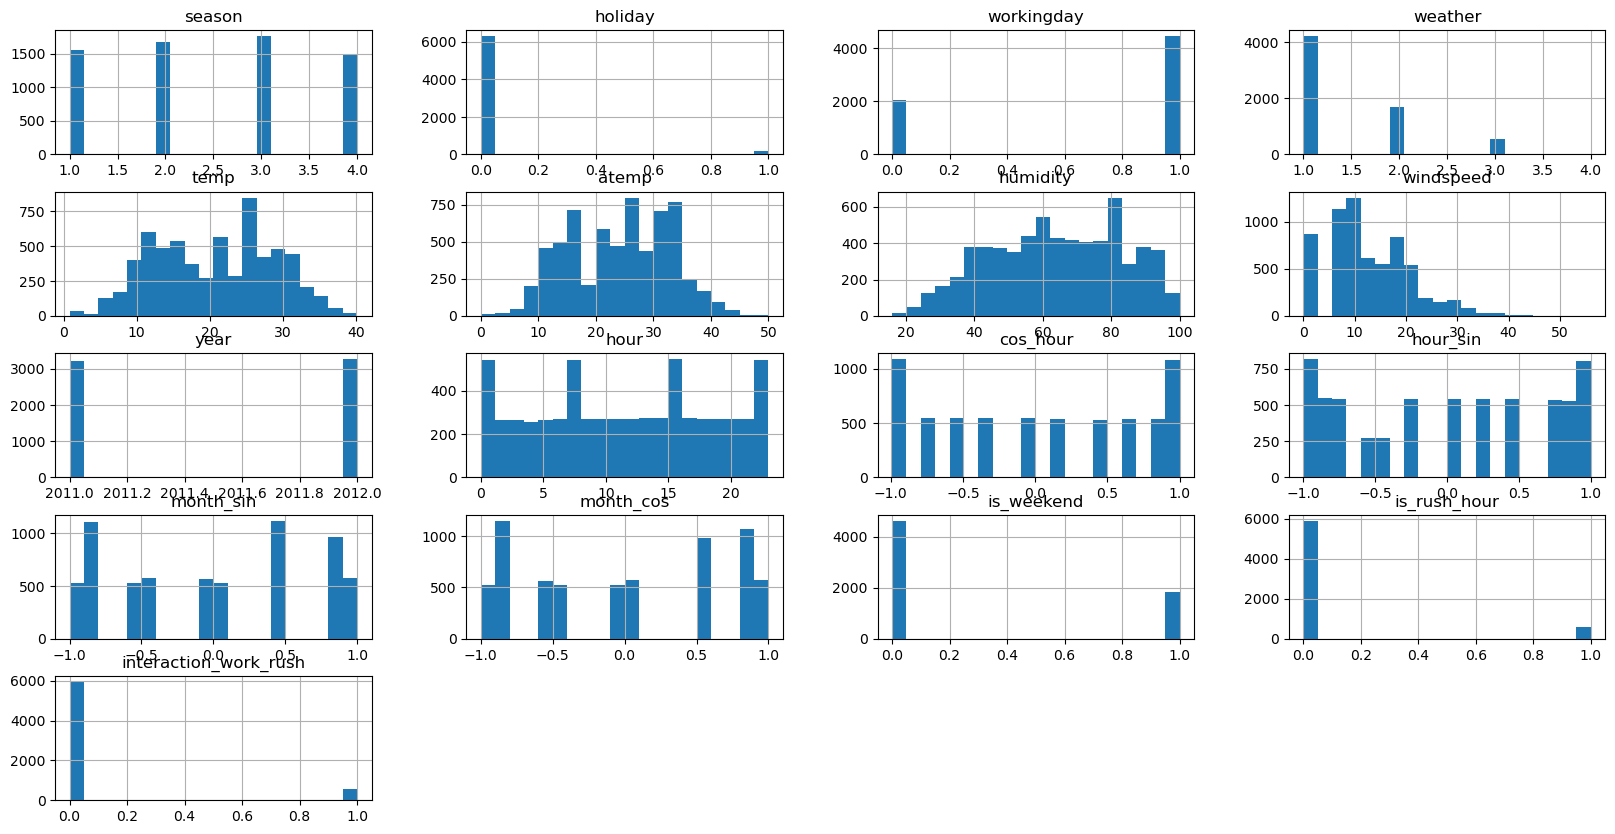

In [3]:
df_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014


## We see that 'casual' and 'registered' features are not available in the test dataset from Kaggle

## Try to find any missing values

In [4]:
df_train[df_train.isna()].count()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
df_test[df_test.isna()].count()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

<AxesSubplot:ylabel='datetime'>

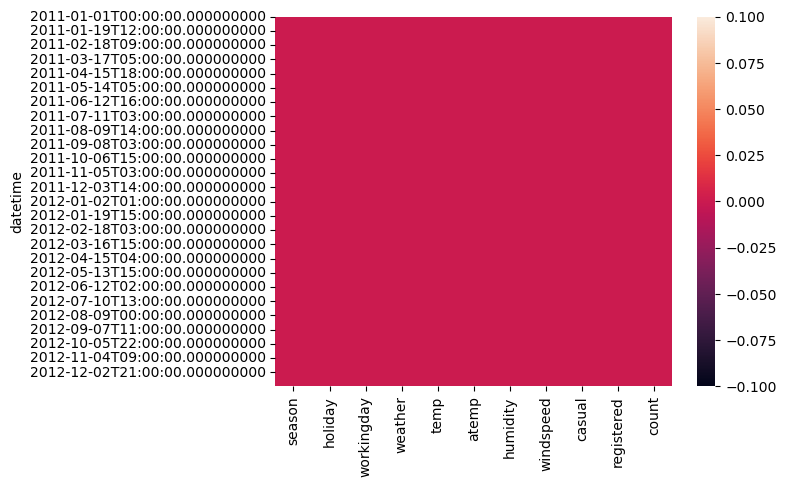

In [6]:
import seaborn as sns

sns.heatmap(df_train.isna())

### No missing values found

<AxesSubplot:xlabel='temp', ylabel='Count'>

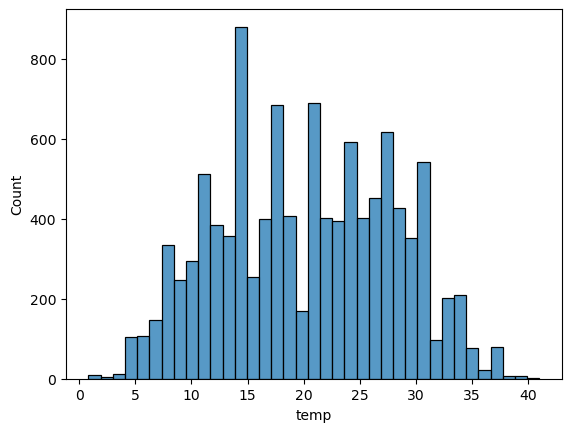

In [7]:
sns.histplot(df_train['temp'])

<AxesSubplot:xlabel='humidity', ylabel='Count'>

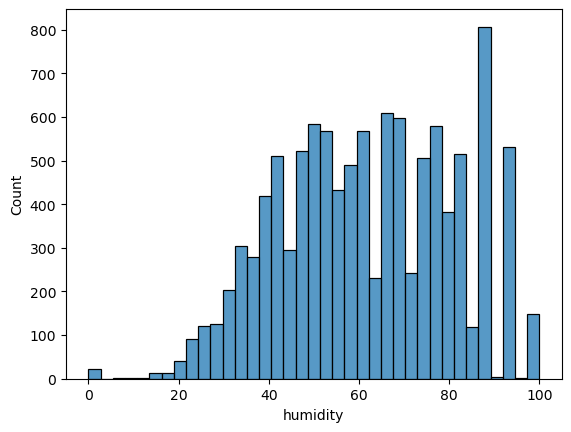

In [8]:
sns.histplot(df_train['humidity'])


<AxesSubplot:xlabel='casual', ylabel='Count'>

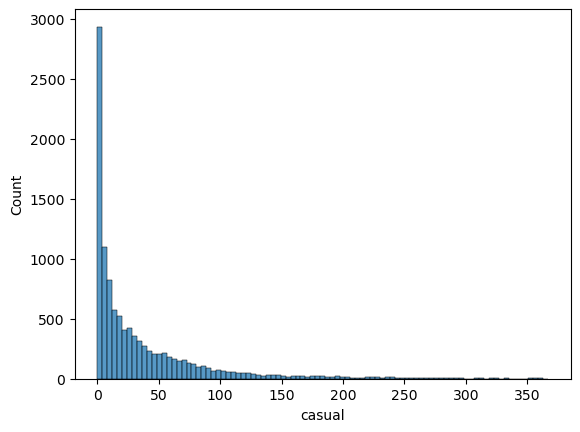

In [9]:
sns.histplot(df_train['casual'])

<AxesSubplot:>

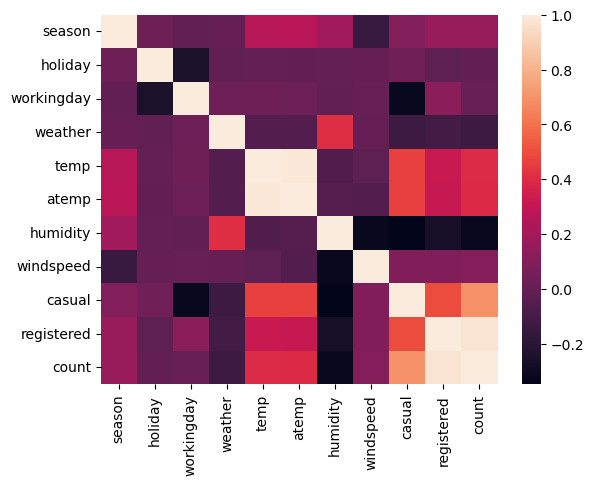

In [10]:
sns.heatmap(df_train.corr())

In [11]:
df_test['holiday'].unique()

array([0, 1])

Temp and atemp are too strongly correlated to justify keeping them both in

## Evaluation

Root Mean Squared Logarithmic Error 

The evaluation will be done in RMSLE

Note that the best  score for random predictions (around 2.34) is not better than the best constant prediction.

In [12]:
df_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


<AxesSubplot:xlabel='datetime'>

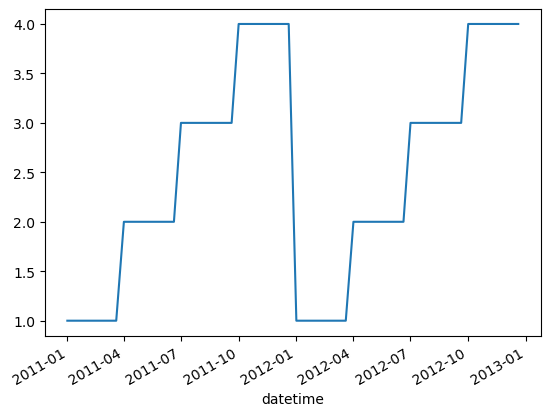

In [13]:
df_train['season'].plot()

<AxesSubplot:xlabel='datetime'>

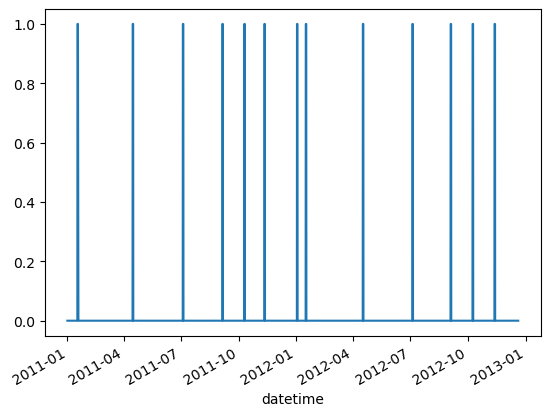

In [14]:
df_train['holiday'].plot()

<AxesSubplot:xlabel='datetime'>

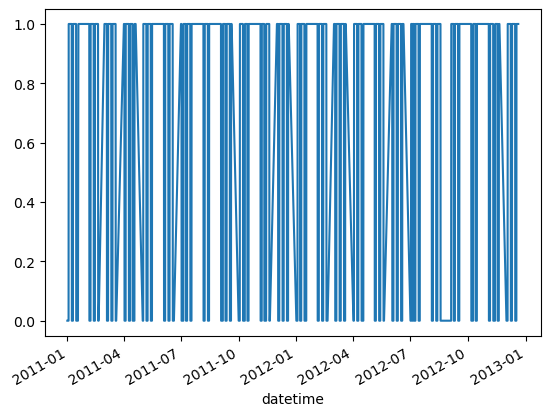

In [15]:
df_train['workingday'].plot()

<AxesSubplot:xlabel='datetime'>

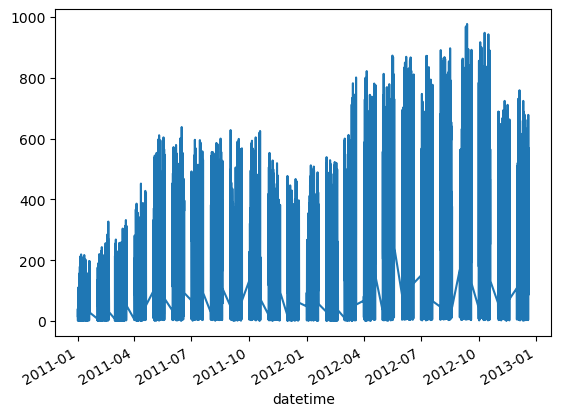

In [16]:
df_train['count'].plot()

df_april = df_train.loc['2011-04']
sns.pairplot(df_april)

In [17]:
df_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

<AxesSubplot:xlabel='datetime'>

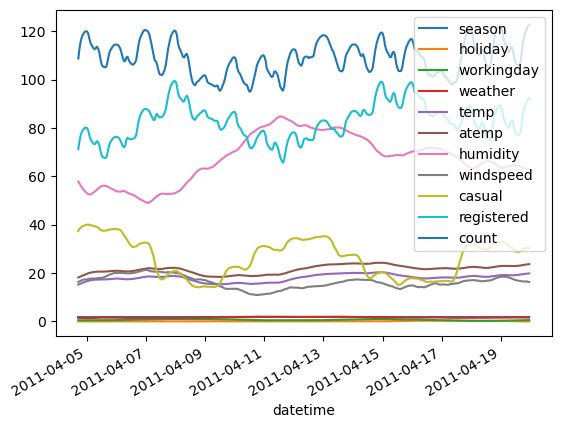

In [18]:
df_train.loc['2011-04'].rolling(90).mean().plot()


In [19]:
import feature_engineering_functions as fe


In [20]:
df_test = fe.add_time_columns(df_test)
df_test.loc[:,'day_of_week']


datetime
2011-01-20 00:00:00    Thursday
2011-01-20 01:00:00    Thursday
2011-01-20 02:00:00    Thursday
2011-01-20 03:00:00    Thursday
2011-01-20 04:00:00    Thursday
                         ...   
2012-12-31 19:00:00      Monday
2012-12-31 20:00:00      Monday
2012-12-31 21:00:00      Monday
2012-12-31 22:00:00      Monday
2012-12-31 23:00:00      Monday
Name: day_of_week, Length: 6493, dtype: object

In [21]:
df_test[df_test['is_weekend'] == 0]


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day_of_week,hour,cos_hour,hour_sin,month_sin,month_cos,is_weekend,time_of_day,is_rush_hour,interaction_work_rush
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,January,Thursday,0,1.000000,0.000000,5.000000e-01,0.866025,0,Night,0,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,January,Thursday,1,0.962917,0.258819,5.000000e-01,0.866025,0,Night,0,0
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,January,Thursday,2,0.854419,0.500000,5.000000e-01,0.866025,0,Night,0,0
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,January,Thursday,3,0.682553,0.707107,5.000000e-01,0.866025,0,Night,0,0
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,January,Thursday,4,0.460065,0.866025,5.000000e-01,0.866025,0,Night,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,December,Monday,19,0.460065,-0.965926,-2.449294e-16,1.000000,0,Evening,0,0
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,December,Monday,20,0.682553,-0.866025,-2.449294e-16,1.000000,0,Evening,0,0
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,December,Monday,21,0.854419,-0.707107,-2.449294e-16,1.000000,0,Evening,0,0


In [22]:
df_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day_of_week,hour,cos_hour,hour_sin,month_sin,month_cos,is_weekend,time_of_day,is_rush_hour,interaction_work_rush
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,January,Thursday,0,1.000000,0.000000,5.000000e-01,0.866025,0,Night,0,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,January,Thursday,1,0.962917,0.258819,5.000000e-01,0.866025,0,Night,0,0
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,January,Thursday,2,0.854419,0.500000,5.000000e-01,0.866025,0,Night,0,0
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,January,Thursday,3,0.682553,0.707107,5.000000e-01,0.866025,0,Night,0,0
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,January,Thursday,4,0.460065,0.866025,5.000000e-01,0.866025,0,Night,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,December,Monday,19,0.460065,-0.965926,-2.449294e-16,1.000000,0,Evening,0,0
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,December,Monday,20,0.682553,-0.866025,-2.449294e-16,1.000000,0,Evening,0,0
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,December,Monday,21,0.854419,-0.707107,-2.449294e-16,1.000000,0,Evening,0,0


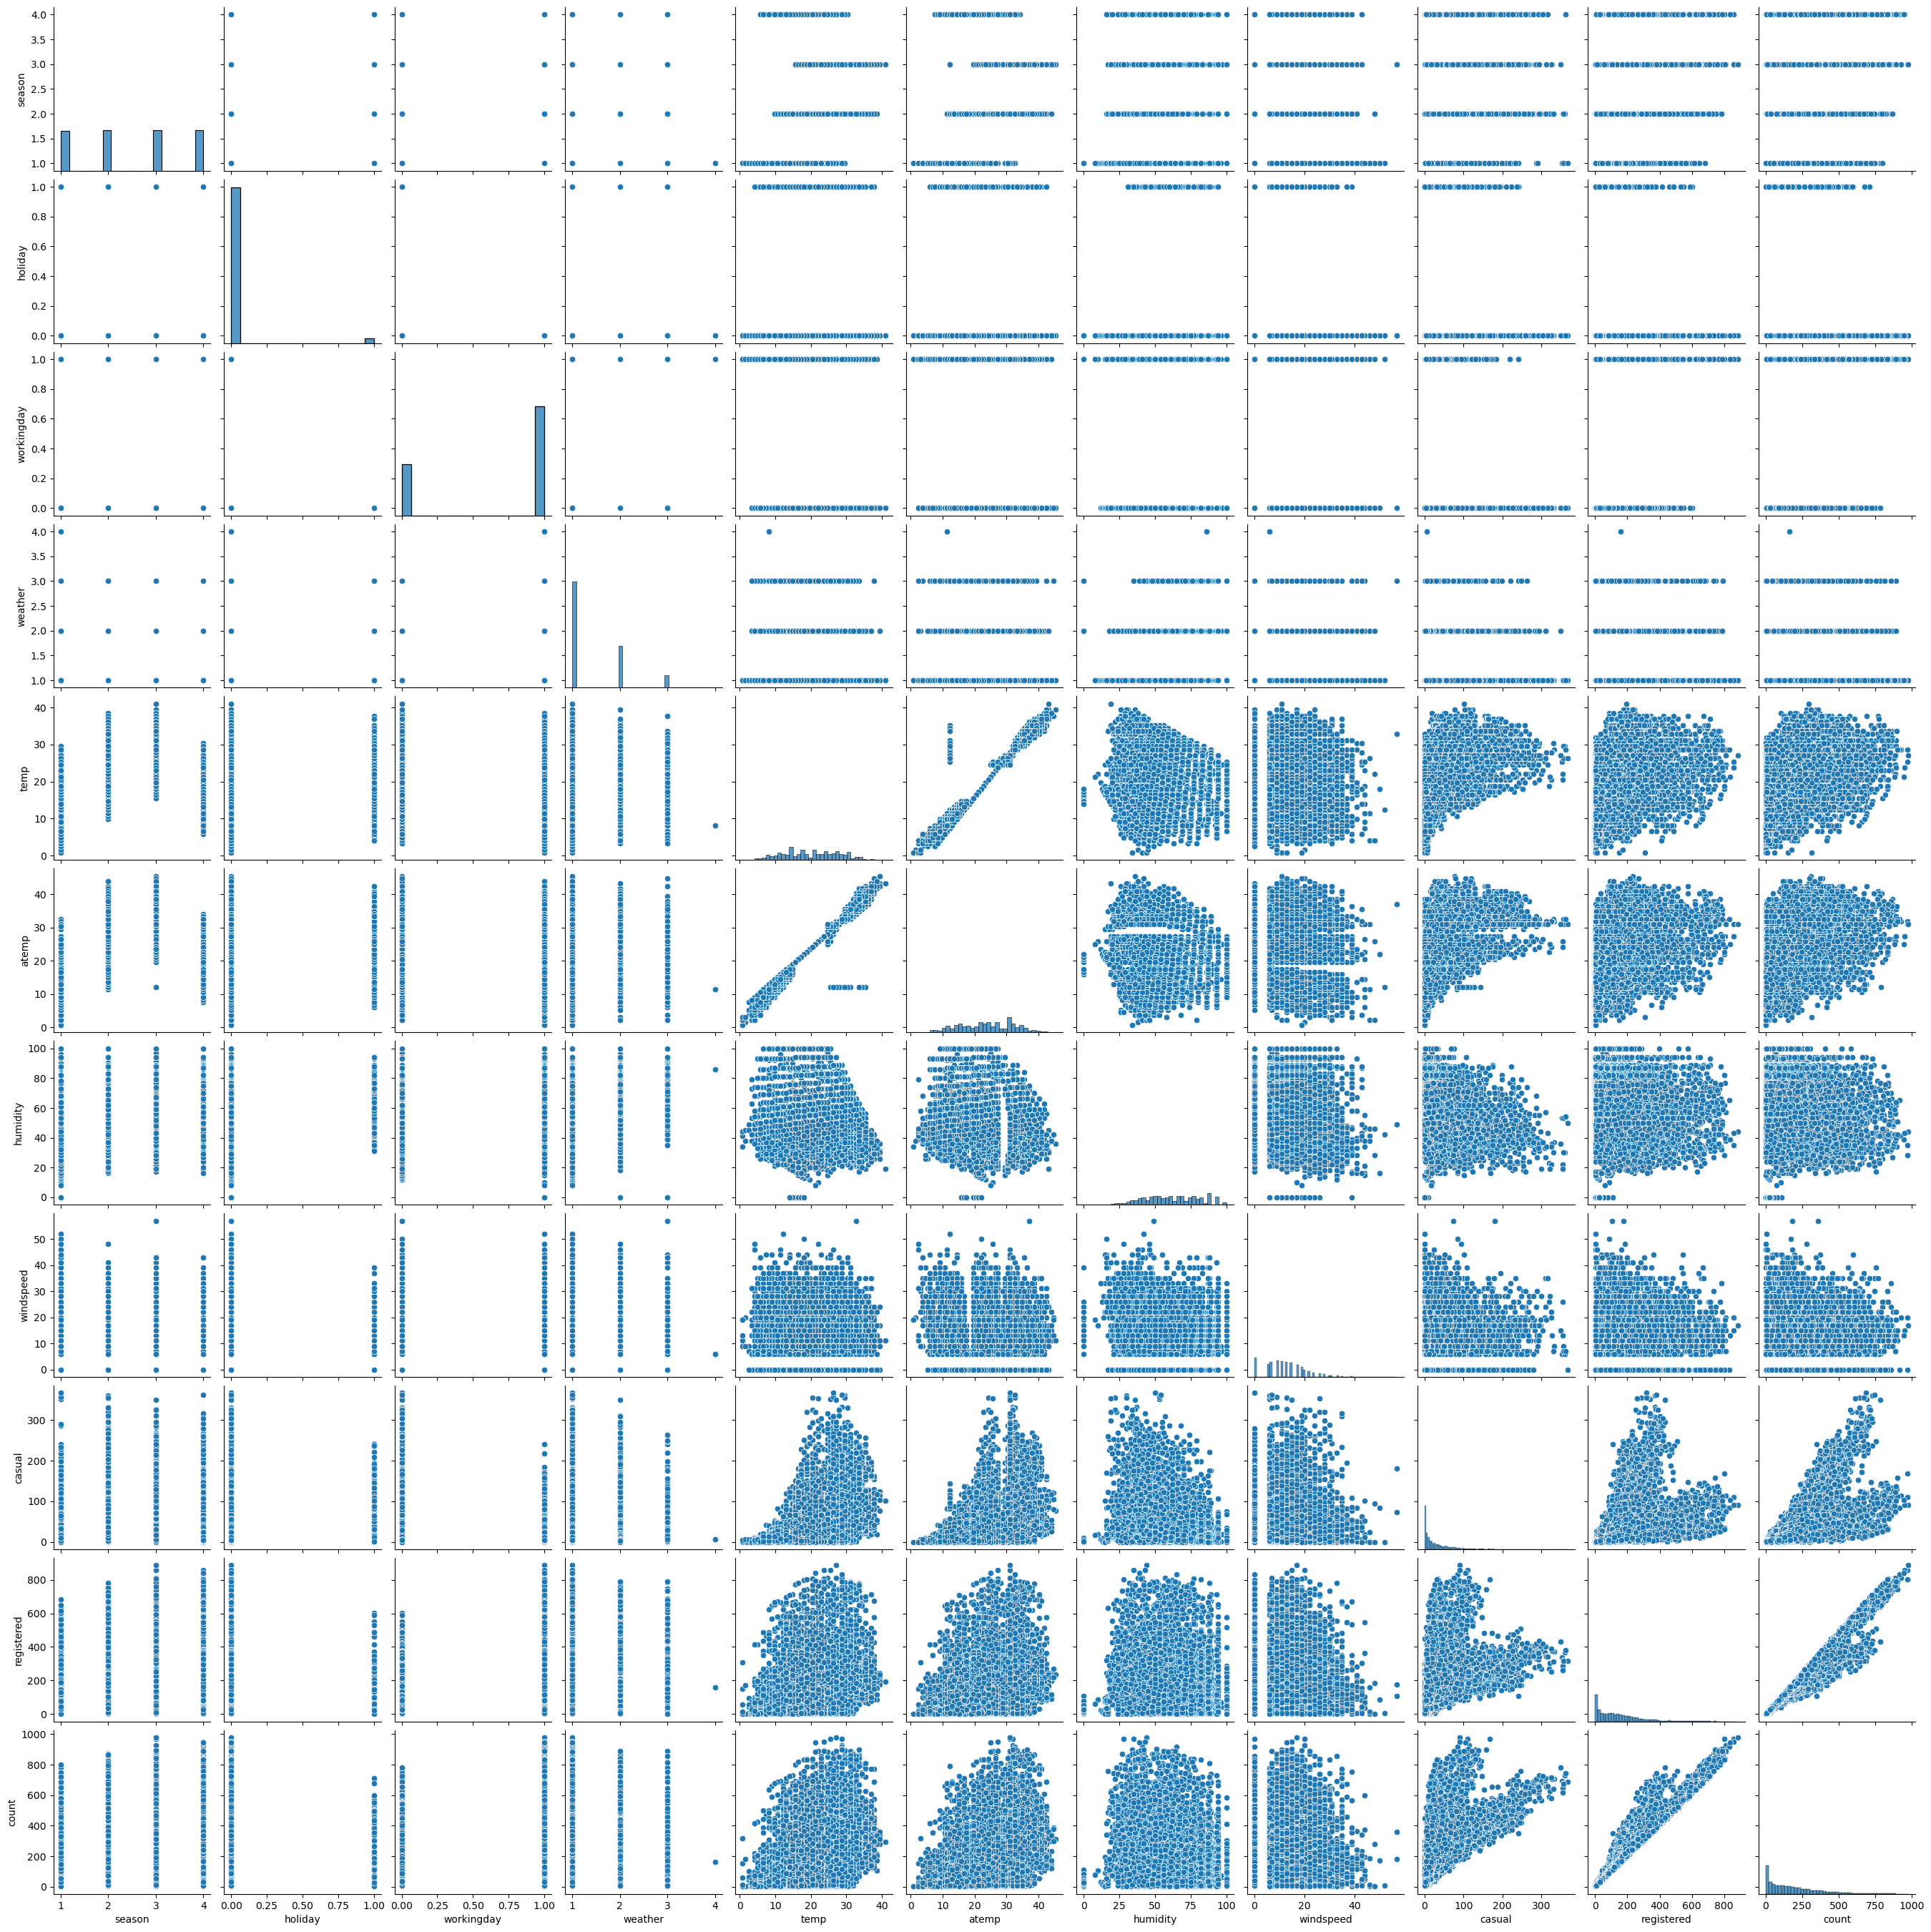

In [ ]:
sns.pairplot(df_train)

## Test for different prediction values

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'cos_hour'}>,
        <AxesSubplot:title={'center':'hour_sin'}>],
       [<AxesSubplot:title={'center':'month_sin'}>,
        <AxesSubplot:title={'center':'month_cos'}>,
        <AxesSubplot:title={'center':'is_weekend'}>,
        <AxesSubplot:title={'center':'is_rush_hour'}>],
       [<AxesSubplot:title={'center':'interaction_work_rush'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

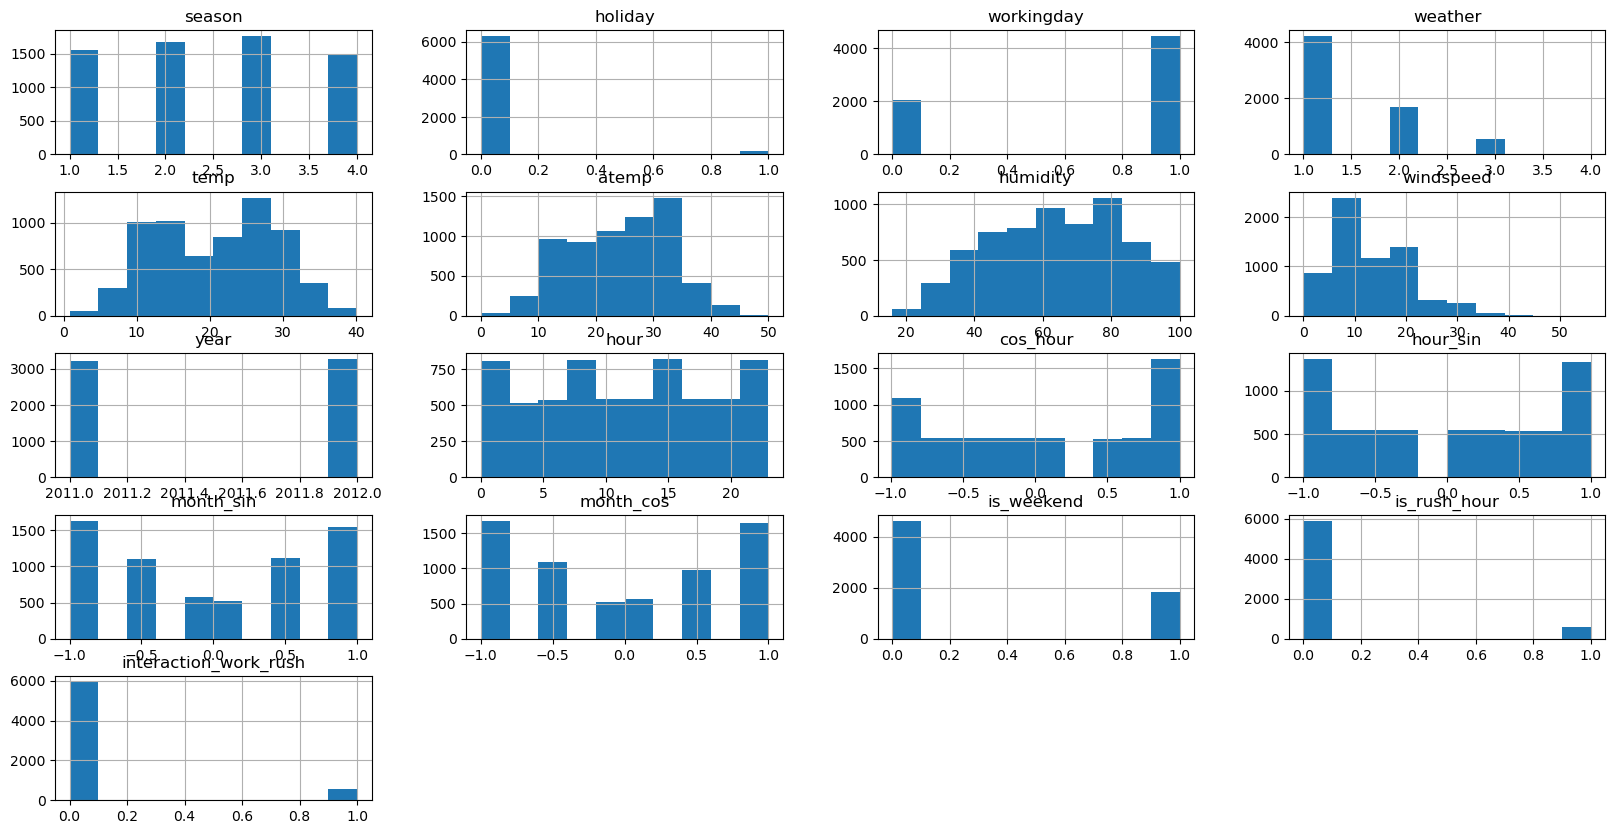

In [37]:
df_test.hist( bins=10, figsize=(20, 10))